In [379]:
import lxml
from lxml import etree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os, os.path
from lxml import etree as ET

In [380]:
VLO41_diffusion_Keil = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/diffusion_csv/diffusion_VLO41_annotations_Keil.csv',encoding='utf-8')
Bamberg_diffusion_Keil = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/diffusion_csv/diffusion_Bamberg_annotations_Keil.csv',encoding='utf-8')
Lat14087_diffusion_Keil = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/diffusion_csv/diffusion_Lat14087_annotations_Keil.csv',encoding='utf-8')
Lat7499_diffusion_Keil = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/diffusion_csv/diffusion_Lat7499_annotations_Keil.csv',encoding='utf-8')

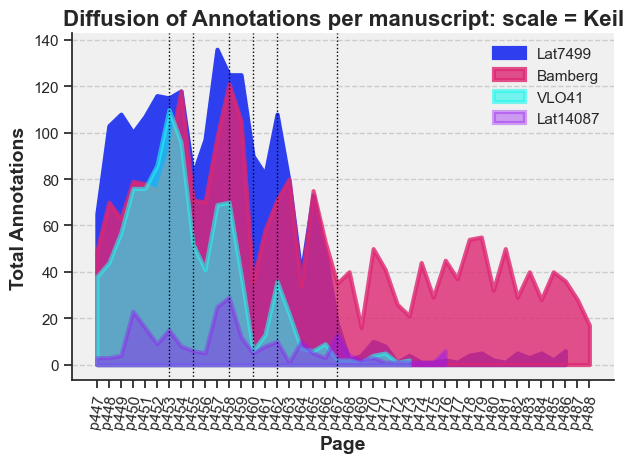

In [381]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
colors = ['#9619F3', '#DE2772', '#21F8EE', '#2E3FEF'] #'#F175AF'

# Concatenate the dataframes horizontally
merged_df = pd.concat([VLO41_diffusion_Keil['gloss'].rename('gloss_id_VLO41'), 
                       VLO41_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_VLO41'),
                       Bamberg_diffusion_Keil['gloss'].rename('gloss_id_Bamberg'), 
                       Bamberg_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_Bamberg'),
                       Lat14087_diffusion_Keil['gloss'].rename('gloss_id_Lat14087'),
                       Lat7499_diffusion_Keil['gloss'].rename('gloss_id_Lat7499'), 
                       Lat7499_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_Lat7499')], axis=1, sort=False)

merged_df['page'] = Bamberg_diffusion_Keil['page']

# Calculate the total annotations per page by summing the values
merged_df['total_annotations_VLO41'] = merged_df['gloss_id_VLO41'] + merged_df['marginal_note_id_VLO41']
merged_df['total_annotations_Bamberg'] = merged_df['gloss_id_Bamberg'] + merged_df['marginal_note_id_Bamberg']
merged_df['total_annotations_Lat14087'] = merged_df['gloss_id_Lat14087']
merged_df['total_annotations_Lat7499'] = merged_df['gloss_id_Lat7499'] + merged_df['marginal_note_id_Lat7499']

merged_df = merged_df[['page', 'total_annotations_Lat14087', 'total_annotations_VLO41', 'total_annotations_Bamberg', 'total_annotations_Lat7499']]

# Set the style using Seaborn
sns.set(style='ticks')

# Create the area chart
plt.fill_between(merged_df['page'], merged_df['total_annotations_Lat7499'], label='Lat7499', color=colors[3], alpha=1.0, linewidth=3)
plt.fill_between(merged_df['page'], merged_df['total_annotations_Bamberg'], label='Bamberg', color=colors[1], alpha=0.8, linewidth=3)
plt.fill_between(merged_df['page'], merged_df['total_annotations_VLO41'], label='VLO41', color=colors[2], alpha=0.6, linewidth=3)
plt.fill_between(merged_df['page'], merged_df['total_annotations_Lat14087'], label='Lat14087', color=colors[0], alpha=0.4, linewidth=3)

# Set x-axis tick labels rotation
plt.xticks(rotation=80)

# Customize font size and style
plt.xlabel('Page', fontsize=14, fontweight='bold')
plt.ylabel('Total Annotations', fontsize=14, fontweight='bold')
plt.title('Diffusion of Annotations per manuscript: scale = Keil', fontsize=16, fontweight='bold')

# Customize legend
plt.legend(frameon=False)

# Set the figure background color
plt.gca().set_facecolor('#F0F0F0')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=1.0)

# Add vertical lines at specified x-axis markers
x_markers = ['p453','p455', 'p458', 'p460', 'p462', 'p467']
for marker in x_markers:
    plt.axvline(x=marker, color='black', linestyle=':', linewidth=1.0)

# Adjust the layout for better spacing
plt.tight_layout()

plt.savefig('graphs/comparative_diffusion_mss_Keil.png')


plt.show()


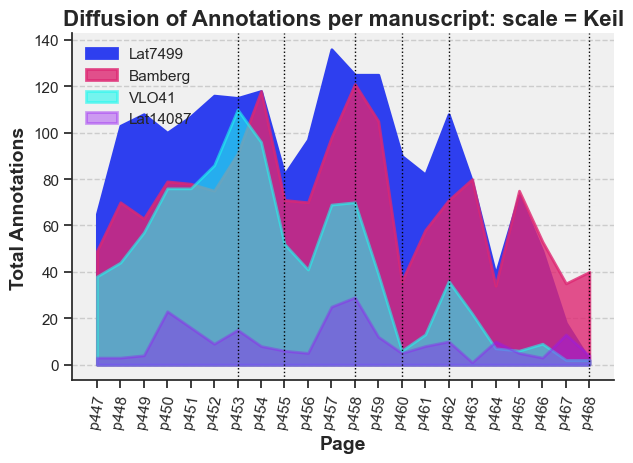

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
colors = ['#9619F3', '#DE2772', '#21F8EE', '#2E3FEF'] #'#F175AF'

# Concatenate the dataframes horizontally
merged_df = pd.concat([VLO41_diffusion_Keil['gloss'].rename('gloss_id_VLO41'), 
                       VLO41_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_VLO41'),
                       Bamberg_diffusion_Keil['gloss'].rename('gloss_id_Bamberg'), 
                       Bamberg_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_Bamberg'),
                       Lat14087_diffusion_Keil['gloss'].rename('gloss_id_Lat14087'),
                       Lat7499_diffusion_Keil['gloss'].rename('gloss_id_Lat7499'), 
                       Lat7499_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_Lat7499')], axis=1, sort=False)

merged_df['page'] = Bamberg_diffusion_Keil['page']



# Calculate the total annotations per page by summing the values
merged_df['total_annotations_VLO41'] = merged_df['gloss_id_VLO41'] + merged_df['marginal_note_id_VLO41']
merged_df['total_annotations_Bamberg'] = merged_df['gloss_id_Bamberg'] + merged_df['marginal_note_id_Bamberg']
merged_df['total_annotations_Lat14087'] = merged_df['gloss_id_Lat14087']
merged_df['total_annotations_Lat7499'] = merged_df['gloss_id_Lat7499'] + merged_df['marginal_note_id_Lat7499']

merged_df = merged_df[['page', 'total_annotations_Lat14087', 'total_annotations_VLO41', 'total_annotations_Bamberg', 'total_annotations_Lat7499']]

# Filter the data up to 'page' 'p467'
filtered_df = merged_df[merged_df['page'] <= 'p468']

# Set the style using Seaborn
sns.set(style='ticks')

# Create the area chart using the filtered dataframe
plt.fill_between(filtered_df['page'], filtered_df['total_annotations_Lat7499'], label='Lat7499', color=colors[3], alpha=1.0, linewidth=2)
plt.fill_between(filtered_df['page'], filtered_df['total_annotations_Bamberg'], label='Bamberg', color=colors[1], alpha=0.8, linewidth=2)
plt.fill_between(filtered_df['page'], filtered_df['total_annotations_VLO41'], label='VLO41', color=colors[2], alpha=0.6, linewidth=2)
plt.fill_between(filtered_df['page'], filtered_df['total_annotations_Lat14087'], label='Lat14087', color=colors[0], alpha=0.4, linewidth=2)

# Set x-axis tick labels rotation
plt.xticks(rotation=80)

# Customize font size and style
plt.xlabel('Page', fontsize=14, fontweight='bold')
plt.ylabel('Total Annotations', fontsize=14, fontweight='bold')
plt.title('Diffusion of Annotations per manuscript: scale = Keil', fontsize=16, fontweight='bold')

# Customize legend
plt.legend(frameon=False)

# Set the figure background color
plt.gca().set_facecolor('#F0F0F0')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=1.0)

# Add vertical lines at specified x-axis markers
x_markers = ['p453','p455', 'p458', 'p460', 'p462', 'p468']
for marker in x_markers:
    plt.axvline(x=marker, color='black', linestyle=':', linewidth=1.0)

# Adjust the layout for better spacing
plt.tight_layout()

plt.savefig('graphs/comparative_diffusion_mss_Keil_firstbook.png')


plt.show()


In [383]:
VLO41 = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/metadata_csv/VLO41.csv',encoding='utf-8')
Bamberg = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/metadata_csv/Bamberg.csv',encoding='utf-8')
Lat14087 = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/metadata_csv/Lat14087.csv',encoding='utf-8')
Lat7499 = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/metadata_csv/Lat7499.csv',encoding='utf-8')

### Role of marginalia in the entire dataset

In [384]:

# Assuming you have four dataframes: df1, df2, df3, df4

# Retrieve the "marginal_note_type" column from each dataframe
col1 = VLO41['marginal_note_type']
col2 = Bamberg['marginal_note_type']
col3 = Lat7499['marginal_note_type']

# Create a new dataframe with the retrieved columns
typologies_marginalia = pd.DataFrame({
    'VLO41': col1,
    'Bamberg': col2,
    'Lat7499': col3,
})

# Optional: Rename the columns if desired
typologies_marginalia.columns = ['marginal_note_type_VLO41', 'marginal_note_type_Bamberg', 'marginal_note_type_Lat7499']

# Print the new dataframe
typologies_marginalia

,marginal_note_type_VLO41,marginal_note_type_Bamberg,marginal_note_type_Lat7499
0,S523,S54,S523
1,NaN,NaN,S23
2,NaN,NaN,S23
3,NaN,NaN,S631
4,NaN,NaN,NaN
...,...,...,...
2035,NaN,NaN,NaN
2036,NaN,NaN,NaN
2037,NaN,NaN,NaN
2038,NaN,NaN,NaN


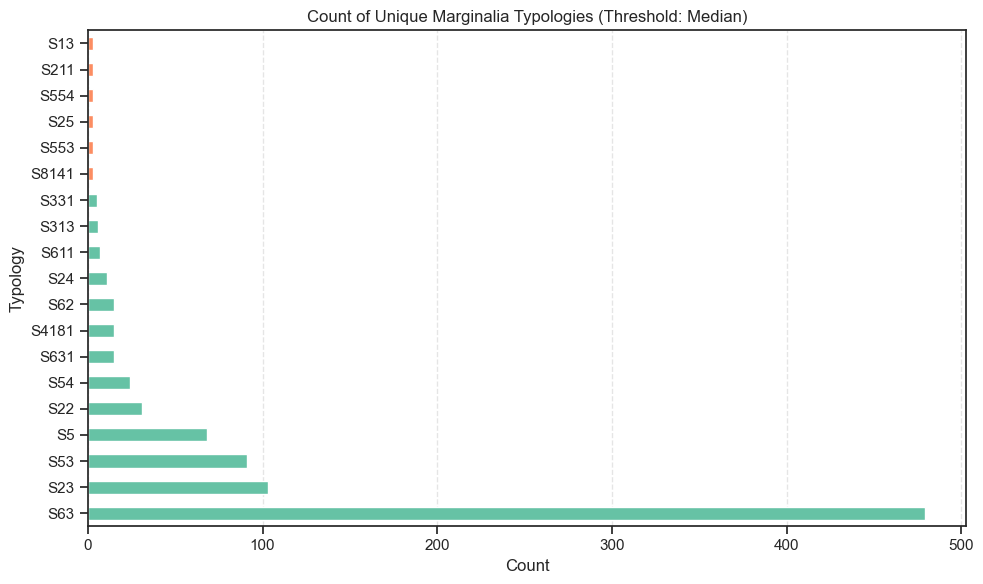

In [385]:
import matplotlib.pyplot as plt
import pandas as pd


# Count the number of occurrences for each typology in all columns
typology_counts = typologies_marginalia.stack().value_counts()

# Filter typologies based on a threshold of minimum occurrences
threshold = typology_counts.median()
typology_counts_filtered = typology_counts[typology_counts >= threshold]

# Calculate the total count
total_count = typology_counts_filtered.sum()

# Calculate the percentage of each typology
typology_percentages = typology_counts_filtered / total_count * 100

# Sort the typologies by count in descending order
typology_counts_sorted = typology_counts_filtered.sort_values(ascending=False)

# Define the colors from the "Set2" color palette
colors = ['#66C2A5', '#FC8D62']

# Determine the color for each typology based on whether it counts more than the median
typology_colors = typology_counts_sorted.apply(lambda x: colors[0] if x > threshold else colors[1])

# Create a horizontal bar plot for typology percentages with different colors for median and above
plt.figure(figsize=(10, 6))
typology_counts_sorted.plot(kind='barh', color=typology_colors)
plt.xlabel('Count')
plt.ylabel('Typology')
plt.title('Count of Unique Marginalia Typologies (Threshold: Median)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [386]:
# Retrieve the "marginal_note_type" column from each dataframe
col1 = VLO41['gloss_type']
col2 = Bamberg['gloss_type']
col3 = Lat7499['gloss_type']

# Create a new dataframe with the retrieved columns
typologies_glosses = pd.DataFrame({
    'VLO41': col1,
    'Bamberg': col2,
    'Lat7499': col3,
})

# Optional: Rename the columns if desired
typologies_glosses.columns = ['gloss_type_VLO41', 'gloss_type_Bamberg', 'gloss_type_Lat7499']

# Print the new dataframe
typologies_glosses

,gloss_type_VLO41,gloss_type_Bamberg,gloss_type_Lat7499
0,NaN,NaN,NaN
1,S23,S22,S36
2,S22,S22,S22
3,S22,S22,S22
4,S22,S22,S22
...,...,...,...
2035,NaN,S23,NaN
2036,NaN,S221,NaN
2037,NaN,S221,NaN
2038,NaN,S221,NaN


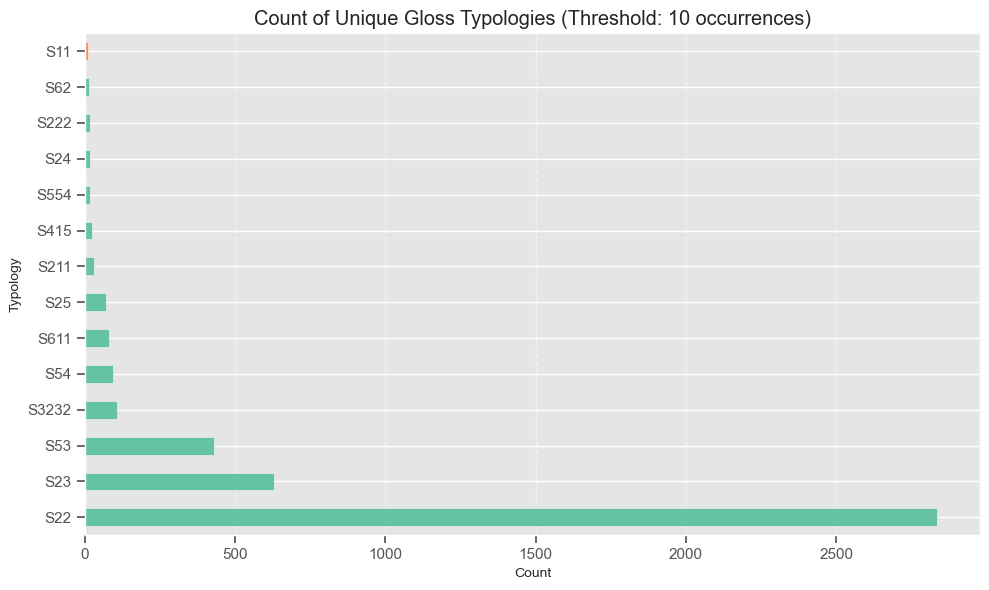

In [419]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the typologies_marginalia dataframe

# Count the number of occurrences for each typology in all columns
typology_counts_glosses = typologies_glosses.stack().value_counts()

# Filter typologies based on a threshold of minimum occurrences
threshold = 10
typology_counts_filtered = typology_counts_glosses[typology_counts_glosses >= threshold]

# Calculate the total count
total_count = typology_counts_filtered.sum()

# Calculate the percentage of each typology
typology_percentages = typology_counts_filtered / total_count * 100

# Sort the typologies by count in descending order
typology_counts_sorted = typology_counts_filtered.sort_values(ascending=False)

# Define the colors from the "Set2" color palette
colors = ['#66C2A5', '#FC8D62']

# Determine the color for each typology based on whether it counts more than the threshold
typology_colors = typology_counts_sorted.apply(lambda x: colors[0] if x > threshold else colors[1])

# Create a horizontal bar plot for typology percentages with different colors for threshold and above
plt.figure(figsize=(10, 6))
typology_counts_sorted.plot(kind='barh', color=typology_colors)
plt.xlabel('Count')
plt.ylabel('Typology')
plt.title('Count of Unique Gloss Typologies (Threshold: 10 occurrences)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


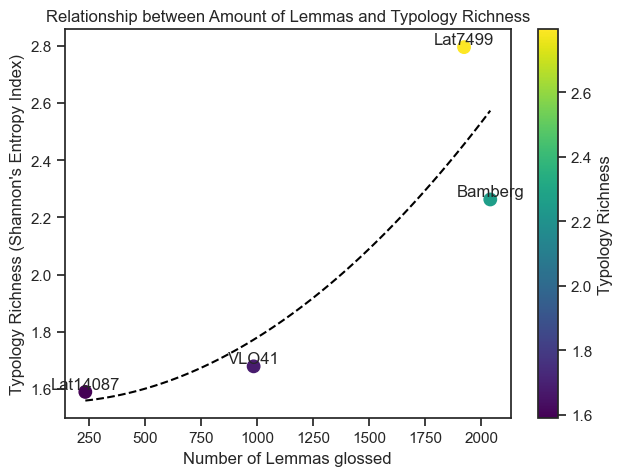

In [388]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

# Define the dataframes
dataframes = [
    VLO41,
    Bamberg,
    Lat14087,
    Lat7499
]

# Define the names of the dataframes
df_names = [
    'VLO41',
    'Bamberg',
    'Lat14087',
    'Lat7499'
]

# Calculate the richness/variety of annotations (entropy-based) and text length (number of lemmas) for each DataFrame
annotation_richness = []
lemmas_length = []

for df in dataframes:
    lemmas = df['lemma_id']
    
    if 'marginal_note_type' in df.columns:
        typologies = df[['gloss_type', 'marginal_note_type']].values.flatten()
    else:
        typologies = df['gloss_type'].values.flatten()
        
    typologies_counts = pd.Series(typologies).value_counts(normalize=True)
    entropy_val = entropy(typologies_counts, base=2)
    annotation_richness.append(entropy_val)
    lemmas_length.append(len(lemmas))

# Create a scatter plot to visualize the relationship between text length and richness of annotations
fig, ax = plt.subplots()
scatter = ax.scatter(text_length, annotation_richness, c=annotation_richness, cmap='viridis', s=80)

# Add labels for each point on the scatter plot with different colors based on variety
for i, mss in enumerate(df_names):
    ax.annotate(mss, (text_length[i], annotation_richness[i]), ha='center', va='bottom')
    

# Add a curve to represent the non-linear relationship
curve_fit = np.polyfit(text_length, lexical_richness, deg=2)
curve_x = np.linspace(min(text_length), max(text_length), 100)
curve_y = np.polyval(curve_fit, curve_x)
ax.plot(curve_x, curve_y, color='black', linestyle='--')

# Set plot labels and title
ax.set_xlabel('Number of Lemmas glossed')
ax.set_ylabel("Typology Richness (Shannon's Entropy Index)")
ax.set_title('Relationship between Amount of Lemmas and Typology Richness')

# Add a colorbar legend
cbar = plt.colorbar(scatter)
cbar.set_label('Typology Richness')

plt.savefig('graphs/lemmas_variety_shannons_entropy.png')


plt.show()

### Let's start by making one by one comparative applications on typology and form to pairs of manuscritps and then merge everything together

In [389]:
merged_df_VLO_Bamberg = pd.merge(VLO41, Bamberg, on='lemma_id', suffixes=('_VLO41', '_Bamberg'))
merged_df_VLO_Bamberg

,lemma_id,folio_VLO41,lemma_VLO41,gloss_VLO41,gloss_type_VLO41,gloss_form_VLO41,marginal_note_id_VLO41,marginal_note_type_VLO41,marginal_note_form_VLO41,folio_Bamberg,lemma_Bamberg,gloss_id,gloss_Bamberg,gloss_type_Bamberg,gloss_form_Bamberg,nature,marginal_note_id_Bamberg,marginal_note_type_Bamberg,marginal_note_form_Bamberg
0,p447_l01_o00,02r,INCIPIT LIBER EVTI/CI GRAMMAT(I)CI /DE VERBO,NaN,NaN,NaN,++++/de uer[bo] ++++/[bo]nus contextor,S523,F4,71r,EVTICII,NaN,NaN,NaN,NaN,NaN,p447_l01_o00_a,S54,F5
1,p447_l05_o02,02r,semper,s. cũ frequentia,S23,F3,NaN,NaN,NaN,71r,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,normal,NaN,NaN,NaN
2,p447_l05_o04,02r,nouas quaestiones,novẽ int̃rogaciones,S22,F3,NaN,NaN,NaN,71r,QVĘSTIONES,p447_l05_o04_a,ꝓ positiones,S22,F2,normal,NaN,NaN,NaN
3,p447_l05_o05,02r,doctorib;,p̃ce<ptoribus>,S22,F2,NaN,NaN,NaN,71r,DOCTORIBVS,p447_l05_o05_a,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ,S22,F2,shorthand,NaN,NaN,NaN
4,p447_l05_o06,02r,auditorum,iđ discipulorũ,S22,F2,NaN,NaN,NaN,71r,AVDITORVM,p447_l05_o06_a,discipulorũ,S22,F2,normal,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,p470_l23_o05,22r,bacchor,furo ł insanior,S22,F3,NaN,NaN,NaN,80r,Bacchor,p470_l23_o05_a,insanio,S22,F2,normal,p470_l23_o05_b,S63,F2
560,p471_l03_o08,22r,foedus,turpis,S22,F2,NaN,NaN,NaN,80r,Fedus,p471_l03_o08_a,turpis,S22,F2,normal,NaN,NaN,NaN
561,p471_l26_o01,22v,trudo,impello,S22,F2,NaN,NaN,NaN,80r,Trudo,p471_l26_o01_a,indudo,S22,F2,normal,NaN,NaN,NaN
562,p476_l07_o09,25r,pango,NaN,NaN,NaN,ille poematu pconpanpango oratius epistularum ...,S72,F4,81v,pango,p476_l07_o09_a,cõpono,S22,F2,normal,p476_l07_o09_b,S63,F2


In [390]:
# Filter the rows where the conditions are met
common_VLO41_Bamberg = merged_df_VLO_Bamberg[
    (merged_df_VLO_Bamberg['gloss_type_VLO41'] == merged_df_VLO_Bamberg['gloss_type_Bamberg']) &
    ((merged_df_VLO_Bamberg['gloss_form_VLO41'] == merged_df_VLO_Bamberg['gloss_form_Bamberg']) |
    (merged_df_VLO_Bamberg['marginal_note_type_VLO41'] == merged_df_VLO_Bamberg['marginal_note_type_Bamberg']))
]

# Select the desired columns
common_VLO41_Bamberg = common_VLO41_Bamberg[['lemma_id', 'gloss_type_VLO41', 'gloss_type_Bamberg',
                                             'gloss_form_VLO41', 'gloss_form_Bamberg']]

# Merge with merged_df_VLO41_Bamberg to get 'lemma_VLO41' and 'lemma_Bamberg'
common_VLO41_Bamberg = common_VLO41_Bamberg.merge(merged_df_VLO_Bamberg[['lemma_id', 'lemma_VLO41', 'gloss_VLO41', 'lemma_Bamberg', 'gloss_Bamberg']],
                                                  on='lemma_id', how='left')

# Display the new DataFrame
common_VLO41_Bamberg.to_csv('identical_glosses_csv/identical_glosses_VLO41_Bamberg.csv')
common_VLO41_Bamberg

,lemma_id,gloss_type_VLO41,gloss_type_Bamberg,gloss_form_VLO41,gloss_form_Bamberg,lemma_VLO41,gloss_VLO41,lemma_Bamberg,gloss_Bamberg
0,p447_l05_o05,S22,S22,F2,F2,doctorib;,p̃ce<ptoribus>,DOCTORIBVS,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ
1,p447_l05_o06,S22,S22,F2,F2,auditorum,iđ discipulorũ,AVDITORVM,discipulorũ
2,p447_l06_o05,S22,S22,F2,F2,curiositas,qͣsi sollicitudo,curiositas,(a cora) sagax sollicitudo
3,p447_l07_o01,S22,S22,F2,F2,desiderat,cupit,desider&,c̃cupiscat
4,p447_l07_o03,S22,S22,F2,F2,recens,nouit(er),recens,nouum
...,...,...,...,...,...,...,...,...,...
233,p466_l22_o02,S22,S22,F2,F2,adipiscor,inueniscor,adipiscor,consequor
234,p468_l15_o10,S22,S22,F2,F2,neco,interficio,neco,int̃ficio
235,p470_l09_o07,S22,S22,F2,F2,glisco,cresco,Glisco,cresco
236,p471_l03_o08,S22,S22,F2,F2,foedus,turpis,Fedus,turpis


In [391]:
merged_df_VLO_Bamberg['page'] = merged_df_VLO_Bamberg['lemma_id'].str.extract(r'(p\d+)')
subset_VLO41Bamberg = merged_df_VLO_Bamberg[['page','lemma_id', 'gloss_form_VLO41','gloss_form_Bamberg']]
subset_VLO41Bamberg = subset_VLO41Bamberg.dropna()

# Convert F1-5 to numerical values 1-5
subset_VLO41Bamberg['gloss_form_VLO41'] = subset_VLO41Bamberg['gloss_form_VLO41'].str.extract('(\d)').astype(int)
subset_VLO41Bamberg['gloss_form_Bamberg'] = subset_VLO41Bamberg['gloss_form_Bamberg'].str.extract('(\d)').astype(int)

# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_VLO41Bamberg['gloss_form_VLO41'] == subset_VLO41Bamberg['gloss_form_Bamberg']).mean()
increase_ratio = (subset_VLO41Bamberg['gloss_form_VLO41'] < subset_VLO41Bamberg['gloss_form_Bamberg']).mean()
decrease_ratio = (subset_VLO41Bamberg['gloss_form_VLO41'] > subset_VLO41Bamberg['gloss_form_Bamberg']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))

Stable Ratio: 52.78%
Increase Ratio: 19.19%
Decrease Ratio: 28.02%


### More can be done, but let's move to the next one 

In [392]:
merged_df_VLO_Lat7499 = pd.merge(VLO41, Lat7499, on='lemma_id', suffixes=('_VLO41', '_Lat7499'))
merged_df_VLO_Lat7499

,lemma_id,folio_VLO41,lemma_VLO41,gloss_VLO41,gloss_type_VLO41,gloss_form_VLO41,marginal_note_id_VLO41,marginal_note_type_VLO41,marginal_note_form_VLO41,folio_Lat7499,lemma_Lat7499,gloss_id,gloss_Lat7499,gloss_type_Lat7499,gloss_form_Lat7499,marginal_note_id_Lat7499,marginal_note_type_Lat7499,marginal_note_form_Lat7499
0,p447_l01_o00,02r,INCIPIT LIBER EVTI/CI GRAMMAT(I)CI /DE VERBO,NaN,NaN,NaN,++++/de uer[bo] ++++/[bo]nus contextor,S523,F4,73r,EVTICII,p447_l01_o00_a,Eutex euticis. Inde euticius eutici,S54,F3,NaN,NaN,NaN
1,p447_l05_o02,02r,semper,s. cũ frequentia,S23,F3,NaN,NaN,NaN,73r,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,p447_l05_o02_b,S23,F5
2,p447_l05_o04,02r,nouas quaestiones,novẽ int̃rogaciones,S22,F3,NaN,NaN,NaN,73r,QVESTIONES,p447_l05_o04_a,÷ ꝓpositiones,S22,F2,p447_l05_o04_b,S631,F5
3,p447_l05_o05,02r,doctorib;,p̃ce<ptoribus>,S22,F2,NaN,NaN,NaN,73r,DOCTORIB,p447_l05_o05_a,magistris p̃ceptorib,S22,F3,NaN,NaN,NaN
4,p447_l05_o06,02r,auditorum,iđ discipulorũ,S22,F2,NaN,NaN,NaN,73r,AVDITORṼ,p447_l05_o06_a,discipuloꝵ,S22,F2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,p466_l06_o03,18v,rimor,ꝑscrutor,S22,F2,NaN,NaN,NaN,84v,Rimor,p466_l06_o03_a,inqͥro,S22,F2,NaN,NaN,NaN
640,p466_l21_o09,19r,paciscor,pactũ facio,S23,F4,NaN,NaN,NaN,84v,pacisor,p466_l21_o09_a,pacẽ fatio,S23,F4,NaN,NaN,NaN
641,p466_l22_o02,19r,adipiscor,inueniscor,S22,F2,NaN,NaN,NaN,84v,Adipiscor;,p466_l22_o02_a,consequor inuenio,S22,F3,NaN,NaN,NaN
642,p470_l09_o07,21v,glisco,cresco,S22,F2,NaN,NaN,NaN,85v,"Glisco,",p470_l09_o07_a,cresco,S22,F2,NaN,NaN,NaN


In [393]:
# Filter the rows where the conditions are met
common_VLO41_Lat7499 = merged_df_VLO_Lat7499[
    (merged_df_VLO_Lat7499['gloss_type_VLO41'] == merged_df_VLO_Lat7499['gloss_type_Lat7499']) &
    ((merged_df_VLO_Lat7499['gloss_form_VLO41'] == merged_df_VLO_Lat7499['gloss_form_Lat7499']) |
    (merged_df_VLO_Lat7499['marginal_note_type_VLO41'] == merged_df_VLO_Lat7499['marginal_note_type_Lat7499']))
]

# Select the desired columns
common_VLO41_Lat7499 = common_VLO41_Lat7499[['lemma_id', 'gloss_type_VLO41', 'gloss_type_Lat7499',
                                             'gloss_form_VLO41', 'gloss_form_Lat7499']]

# Merge with merged_df_VLO41_Bamberg to get 'lemma_VLO41' and 'lemma_Bamberg'
common_VLO41_Lat7499 = common_VLO41_Lat7499.merge(merged_df_VLO_Lat7499[['lemma_id', 'lemma_VLO41', 'gloss_VLO41', 'lemma_Lat7499', 'gloss_Lat7499']],
                                                  on='lemma_id', how='left')

# Display the new DataFrame
common_VLO41_Lat7499.to_csv('identical_glosses_csv/identical_glosses_VLO41_Lat7499.csv')
common_VLO41_Lat7499

,lemma_id,gloss_type_VLO41,gloss_type_Lat7499,gloss_form_VLO41,gloss_form_Lat7499,lemma_VLO41,gloss_VLO41,lemma_Lat7499,gloss_Lat7499
0,p447_l05_o06,S22,S22,F2,F2,auditorum,iđ discipulorũ,AVDITORṼ,discipuloꝵ
1,p447_l05_o08,S22,S22,F3,F3,cõmouere,reperire et excitare,commouere,suscitare incitare
2,p447_l07_o01,S22,S22,F2,F2,desiderat,cupit,desideret,.s. audire
3,p447_l07_o03,S22,S22,F2,F2,recens,nouit(er),recens,Nouũ
4,p447_l09_o05,S553,S553,F3,F3,Cratere,nom̃ ꝓpͥũ,CRATERE,ꝓpͥũ nom̃
...,...,...,...,...,...,...,...,...,...
227,p463_l25_o09,S22,S22,F2,F2,metior,mensuro,metior,÷ mensuro
228,p464_l13_o09,S22,S22,F2,F2,eger,infirmus,ager,infirmꝰ
229,p466_l06_o03,S22,S22,F2,F2,rimor,ꝑscrutor,Rimor,inqͥro
230,p466_l21_o09,S23,S23,F4,F4,paciscor,pactũ facio,pacisor,pacẽ fatio


In [394]:
merged_df_VLO_Lat7499['page'] = merged_df_VLO_Lat7499['lemma_id'].str.extract(r'(p\d+)')
subset_VLO41Lat7499 = merged_df_VLO_Lat7499[['page','lemma_id', 'gloss_form_VLO41','gloss_form_Lat7499']]
subset_VLO41Lat7499 = subset_VLO41Lat7499.dropna()

# Convert F1-5 to numerical values 1-5
subset_VLO41Lat7499['gloss_form_VLO41'] = subset_VLO41Lat7499['gloss_form_VLO41'].str.extract('(\d)').astype(int)
subset_VLO41Lat7499['gloss_form_Lat7499'] = subset_VLO41Lat7499['gloss_form_Lat7499'].str.extract('(\d)').astype(int)

# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_VLO41Lat7499['gloss_form_VLO41'] == subset_VLO41Lat7499['gloss_form_Lat7499']).mean()
increase_ratio = (subset_VLO41Lat7499['gloss_form_VLO41'] < subset_VLO41Lat7499['gloss_form_Lat7499']).mean()
decrease_ratio = (subset_VLO41Lat7499['gloss_form_VLO41'] > subset_VLO41Lat7499['gloss_form_Lat7499']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))

Stable Ratio: 48.91%
Increase Ratio: 36.39%
Decrease Ratio: 14.69%


### More can be done, but let's move to the next one 

In [395]:
merged_df_VLO_Lat14087 = pd.merge(VLO41, Lat14087, on='lemma_id', suffixes=('_VLO41', '_Lat14087'))
merged_df_VLO_Lat14087

,lemma_id,folio,lemma,gloss_VLO41,gloss_type_VLO41,gloss_form_VLO41,marginal_note_id,marginal_note_type,marginal_note_form,gloss_Lat14087,gloss_type_Lat14087,gloss_form_Lat14087
0,p447_l05_o05,02r,doctorib;,p̃ce<ptoribus>,S22,F2,NaN,NaN,NaN,Preceptor. doctor ł magifter,S22,F3
1,p447_l05_o06,02r,auditorum,iđ discipulorũ,S22,F2,NaN,NaN,NaN,Adiutor/ discipulus,S23,F2
2,p447_l18_o05,02r,BARIΘONOC,grauis sonus,S211,F3,NaN,NaN,NaN,Barithonos/Aliena atona,S23,F3
3,p448_l02_o08,02r,ΠE/ΡΙCΠΟΜΕΝΕ,ꝑicpomene circũflexibilis,S211,F3,NaN,NaN,NaN,Perspomene. quasi circũ flexo,S211,F3
4,p448_l20_o07,02v,sodes,si audes,S23,F3,NaN,NaN,NaN,si audes,S25,F3
...,...,...,...,...,...,...,...,...,...,...,...,...
137,p465_l28_o07,18r,amitior,tego,S22,F2,NaN,NaN,NaN,Amicior . Vestio circũdo induo togo,S22,F3
138,p466_l05_o04,18v,uador,error,S22,F2,NaN,NaN,NaN,Vador. ꝓmitto. causã ago. fidẽ fatio,S23,F4
139,p466_l21_o09,19r,paciscor,pactũ facio,S23,F4,NaN,NaN,NaN,Pasciscor pacẽ redintegror,S23,F4
140,p466_l22_o02,19r,adipiscor,inueniscor,S22,F2,NaN,NaN,NaN,Adipiscor conor / Nasiciscor Adipiscor Assequor,S22,F3


In [396]:
# Filter the rows where the conditions are met
common_VLO41_Lat14087 = merged_df_VLO_Lat14087[
    (merged_df_VLO_Lat14087['gloss_type_VLO41'] == merged_df_VLO_Lat14087['gloss_type_Lat14087']) &
    ((merged_df_VLO_Lat14087['gloss_form_VLO41'] == merged_df_VLO_Lat14087['gloss_form_Lat14087']))
]

# Select the desired columns
common_VLO41_Lat14087 = common_VLO41_Lat14087[['lemma_id', 'gloss_type_VLO41', 'gloss_type_Lat14087',
                                             'gloss_form_VLO41', 'gloss_form_Lat14087']]

# Merge with merged_df_VLO41_Bamberg to get 'lemma_VLO41' and 'lemma_Bamberg'
common_VLO41_Lat14087 = common_VLO41_Lat14087.merge(merged_df_VLO_Lat14087[['lemma_id', 'lemma', 'gloss_VLO41', 'gloss_Lat14087']],
                                                  on='lemma_id', how='left')

# Display the new DataFrame
common_VLO41_Lat14087.to_csv('identical_glosses_csv/identical_glosses_VLO41_Lat14087.csv')
common_VLO41_Lat14087

,lemma_id,gloss_type_VLO41,gloss_type_Lat14087,gloss_form_VLO41,gloss_form_Lat14087,lemma,gloss_VLO41,gloss_Lat14087
0,p448_l02_o08,S211,S211,F3,F3,ΠE/ΡΙCΠΟΜΕΝΕ,ꝑicpomene circũflexibilis,Perspomene. quasi circũ flexo
1,p450_l02_o04,S22,S22,F2,F2,enucleo,aperio,Nucleo. claudo
2,p450_l06_o07,S22,S22,F2,F2,fatuo,desinio,fatuor hebesco
3,p450_l26_o01,S22,S22,F3,F3,pio,purgo/mundo,Pio purgo placo
4,p451_l11_o04,S22,S22,F3,F3,insignio,orno/redimio,insignior. orno. nobilito
5,p451_l12_o02,S22,S22,F2,F2,Sopio,dormio,Sopio Dormio
6,p451_l12_o03,S22,S22,F2,F2,Ferio,ꝑcucio,Exsicco ł ferio
7,p451_l22_o06,S22,S22,F2,F2,fodio,ꝑforo,fodio ł colligo
8,p451_l23_o05,S22,S22,F2,F2,potior,utor,Potior fruor
9,p452_l16_o06,S22,S22,F3,F3,sacrifico,libo/aliqͣ oblatio,libo sacrifico uel deglisto


In [397]:
merged_df_VLO_Lat14087['page'] = merged_df_VLO_Lat14087['lemma_id'].str.extract(r'(p\d+)')
subset_VLO41Lat14087 = merged_df_VLO_Lat14087[['page','lemma_id', 'gloss_form_VLO41','gloss_form_Lat14087']]
subset_VLO41Lat14087 = subset_VLO41Lat14087.dropna()

# Convert F1-5 to numerical values 1-5
subset_VLO41Lat14087['gloss_form_VLO41'] = subset_VLO41Lat14087['gloss_form_VLO41'].str.extract('(\d)').astype(int)
subset_VLO41Lat14087['gloss_form_Lat14087'] = subset_VLO41Lat14087['gloss_form_Lat14087'].str.extract('(\d)').astype(int)

# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_VLO41Lat14087['gloss_form_VLO41'] == subset_VLO41Lat14087['gloss_form_Lat14087']).mean()
increase_ratio = (subset_VLO41Lat14087['gloss_form_VLO41'] < subset_VLO41Lat14087['gloss_form_Lat14087']).mean()
decrease_ratio = (subset_VLO41Lat14087['gloss_form_VLO41'] > subset_VLO41Lat14087['gloss_form_Lat14087']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))

Stable Ratio: 38.41%
Increase Ratio: 42.75%
Decrease Ratio: 18.84%


### More can be done, but let's move to the next one 

In [398]:
merged_df_Bamberg_Lat7499 = pd.merge(Bamberg, Lat7499, on='lemma_id', suffixes=('_Bamberg', '_Lat7499'))
merged_df_Bamberg_Lat7499

,folio_Bamberg,lemma_id,lemma_Bamberg,gloss_id_Bamberg,gloss_Bamberg,gloss_type_Bamberg,gloss_form_Bamberg,nature,marginal_note_id_Bamberg,marginal_note_type_Bamberg,marginal_note_form_Bamberg,folio_Lat7499,lemma_Lat7499,gloss_id_Lat7499,gloss_Lat7499,gloss_type_Lat7499,gloss_form_Lat7499,marginal_note_id_Lat7499,marginal_note_type_Lat7499,marginal_note_form_Lat7499
0,71r,p447_l01_o00,EVTICII,NaN,NaN,NaN,NaN,NaN,p447_l01_o00_a,S54,F5,73r,EVTICII,p447_l01_o00_a,Eutex euticis. Inde euticius eutici,S54,F3,NaN,NaN,NaN
1,71r,p447_l05_o02,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,normal,NaN,NaN,NaN,73r,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,p447_l05_o02_b,S23,F5
2,71r,p447_l05_o04,QVĘSTIONES,p447_l05_o04_a,ꝓ positiones,S22,F2,normal,NaN,NaN,NaN,73r,QVESTIONES,p447_l05_o04_a,÷ ꝓpositiones,S22,F2,p447_l05_o04_b,S631,F5
3,71r,p447_l05_o05,DOCTORIBVS,p447_l05_o05_a,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ,S22,F2,shorthand,NaN,NaN,NaN,73r,DOCTORIB,p447_l05_o05_a,magistris p̃ceptorib,S22,F3,NaN,NaN,NaN
4,71r,p447_l05_o06,AVDITORVM,p447_l05_o06_a,discipulorũ,S22,F2,normal,NaN,NaN,NaN,73r,AVDITORṼ,p447_l05_o06_a,discipuloꝵ,S22,F2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,83r,p482_l11_o01-02,in .ror.,NaN,NaN,NaN,NaN,NaN,p482_l11_o01-02_a,S63,F3,89v,in .ror.,NaN,NaN,NaN,NaN,p482_l14_o01-02_a,S63,F1
1099,83r,p482_l14_o01-02,in .so.,NaN,NaN,NaN,NaN,NaN,p482_l14_o01-02_a,S63,F3,89v,In .so.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1100,83v,p483_l20_o04,"Exulto,",p483_l20_o04_a,l&or,S22,F2,normal,NaN,NaN,NaN,90r,exultat,p483_l20_o04_a,s,S611,F1,NaN,NaN,NaN
1101,84r,p485_l20_o04-05,in .xor.,NaN,NaN,NaN,NaN,NaN,p485_l20_o04-05_a,S63,F2,90v,\n In .xor.,NaN,NaN,NaN,NaN,p485_l20_o04-05_a,S63,F3


### Let's see out of the total common lemmas glossed, how many in Bamberg correspond to tironian sign par rapport at the "normal" one in Lat7499. This can a) help determine the degree of tironian signs used as glosses, 2) which lemmas were glossed with tironian signs (is there something that unites them, are there the easiest to shorthand?) 3) determine a degree of material that would appeal to someone familiar with shorthand

In [399]:
tironian_Bamberg_Lat7499 = merged_df_Bamberg_Lat7499[['lemma_id', 'lemma_Bamberg', 'gloss_Bamberg', 'nature', 'lemma_Lat7499', 'gloss_Lat7499']]
tironian_Bamberg_Lat7499 = tironian_Bamberg_Lat7499[tironian_Bamberg_Lat7499['nature'] == 'shorthand']
tironian_Bamberg_Lat7499 = tironian_Bamberg_Lat7499.dropna()
tironian_Bamberg_Lat7499.to_csv('Bamberg_Lat7499_tironian_glosses.csv')

In [400]:

shorthand_rows = Bamberg[Bamberg['nature'] == 'shorthand']

# Count the number of 'shorthand' rows
shorthand_count = len(shorthand_rows)

# Count the total number of rows in the merged DataFrame
total_count = len(merged_df_Bamberg_Lat7499)

tironian_count = len(tironian_Bamberg_Lat7499)

# Calculate the percentage
percentage = (tironian_count / total_count) * 100

# Print the results
print(f"Number of 'shorthand' glosses not used for in-common-glossing with Lat7499: {shorthand_count}")
print(f"Total number of rows of shared lemmas between Bamberg and Lat7499:  {total_count}, out of which :")
print(f"Number of 'tironian' rows in the common Bamberg-Lat7499 dataframe: {tironian_count}")
print(f"Percentage of 'tironian' rows: {percentage:.2f}%")

Number of 'shorthand' glosses not used for in-common-glossing with Lat7499: 265
Total number of rows of shared lemmas between Bamberg and Lat7499:  1103, out of which :
Number of 'tironian' rows in the common Bamberg-Lat7499 dataframe: 148
Percentage of 'tironian' rows: 13.42%


In [401]:
# Filter the rows where the conditions are met
common_Bamberg_Lat7499 = merged_df_Bamberg_Lat7499[
    (merged_df_Bamberg_Lat7499['gloss_type_Bamberg'] == merged_df_Bamberg_Lat7499['gloss_type_Lat7499']) &
    ((merged_df_Bamberg_Lat7499['gloss_form_Bamberg'] == merged_df_Bamberg_Lat7499['gloss_form_Lat7499']) |
    (merged_df_Bamberg_Lat7499['marginal_note_type_Bamberg'] == merged_df_Bamberg_Lat7499['marginal_note_type_Lat7499']))
]

# Select the desired columns
common_Bamberg_Lat7499 = common_Bamberg_Lat7499[['lemma_id', 'gloss_type_Bamberg', 'gloss_type_Lat7499',
                                             'gloss_form_Bamberg', 'gloss_form_Lat7499']]

# Merge with merged_df_Bamberg_Lat7499 to get 'lemma_Bamberg' and 'lemma_Lat7499'
common_Bamberg_Lat7499 = common_Bamberg_Lat7499.merge(merged_df_Bamberg_Lat7499[['lemma_id', 'lemma_Bamberg', 'gloss_Bamberg', 'lemma_Lat7499', 'gloss_Lat7499']],
                                                  on='lemma_id', how='left')

# Save the result as a CSV file
common_Bamberg_Lat7499.to_csv('identical_glosses_csv/identical_glosses_Bamberg_Lat7499.csv', index=False)

# Display the new DataFrame
common_Bamberg_Lat7499


,lemma_id,gloss_type_Bamberg,gloss_type_Lat7499,gloss_form_Bamberg,gloss_form_Lat7499,lemma_Bamberg,gloss_Bamberg,lemma_Lat7499,gloss_Lat7499
0,p447_l05_o02,S22,S22,F2,F2,SEMPER,ꝓ sepe,SEMPER,ꝓ sepe
1,p447_l05_o04,S22,S22,F2,F2,QVĘSTIONES,ꝓ positiones,QVESTIONES,÷ ꝓpositiones
2,p447_l05_o06,S22,S22,F2,F2,AVDITORVM,discipulorũ,AVDITORṼ,discipuloꝵ
3,p447_l05_o07,S22,S22,F3,F3,ACVTIora,peritiora astutiora /subtiliora VALᵈ ͤ <...?>/...,acutiora,"efficatiora ÷ ualde acuta, peritiora acutiora ..."
4,p447_l07_o01,S22,S22,F2,F2,desider&,c̃cupiscat,desideret,.s. audire
...,...,...,...,...,...,...,...,...,...
509,p472_l09_o01,S22,S22,F2,F2,cedt̃,uerberare,cędunt,uerberant
510,p473_l01_o01,S22,S22,F2,F2,Secundus,prosꝑ,Secunđ,÷ ꝓsꝑ
511,p474_l18_o08,S22,S22,F2,F2,no,nato,no,nato
512,p474_l19_o04,S22,S22,F2,F2,for,loquor,for,loquor


In [402]:
merged_df_Bamberg_Lat7499['page'] = merged_df_Bamberg_Lat7499['lemma_id'].str.extract(r'(p\d+)')
subset_BambergLat7499 = merged_df_Bamberg_Lat7499[['page','lemma_id', 'gloss_form_Lat7499', 'gloss_form_Bamberg']]
subset_BambergLat7499 = subset_BambergLat7499.dropna()
#subset_BambergLat7499

# Convert F1-5 to numerical values 1-5
subset_BambergLat7499['gloss_form_Bamberg'] = subset_BambergLat7499['gloss_form_Bamberg'].str.extract('(\d)').astype(int)
subset_BambergLat7499['gloss_form_Lat7499'] = subset_BambergLat7499['gloss_form_Lat7499'].str.extract('(\d)').astype(int)

# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_BambergLat7499['gloss_form_Bamberg'] == subset_BambergLat7499['gloss_form_Lat7499']).mean()
increase_ratio = (subset_BambergLat7499['gloss_form_Bamberg'] < subset_BambergLat7499['gloss_form_Lat7499']).mean()
decrease_ratio = (subset_BambergLat7499['gloss_form_Bamberg'] > subset_BambergLat7499['gloss_form_Lat7499']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))

Stable Ratio: 56.98%
Increase Ratio: 36.09%
Decrease Ratio: 6.93%


### More can be done, but let's move to the next one 


In [403]:
merged_df_Bamberg_Lat14087 = pd.merge(Bamberg, Lat14087, on='lemma_id', suffixes=('_Bamberg', '_Lat14087'))
merged_df_Bamberg_Lat14087

,folio,lemma_id,lemma,gloss_id,gloss_Bamberg,gloss_type_Bamberg,gloss_form_Bamberg,nature,marginal_note_id,marginal_note_type,marginal_note_form,gloss_Lat14087,gloss_type_Lat14087,gloss_form_Lat14087
0,71r,p447_l05_o05,DOCTORIBVS,p447_l05_o05_a,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ,S22,F2,shorthand,NaN,NaN,NaN,Preceptor. doctor ł magifter,S22,F3
1,71r,p447_l05_o06,AVDITORVM,p447_l05_o06_a,discipulorũ,S22,F2,normal,NaN,NaN,NaN,Adiutor/ discipulus,S23,F2
2,71r,p447_l18_o05,barutonos,p447_l18_o05_a,bari apud g̃cos dr̃ grauis tonos accentꝰ inde/...,S211,F4,normal,NaN,NaN,NaN,Barithonos/Aliena atona,S23,F3
3,71r,p448_l02_o08,ꝑispomene,p448_l02_o08_a,peri DIC ͥ ͭ ͧ ͬ circũ UNDE perispomene IDEST...,S211,F4,normal,NaN,NaN,NaN,Perspomene. quasi circũ flexo,S211,F3
4,71r,p448_l20_o07,"sodes,",p448_l20_o07_a,si audes,S25,F3,normal,NaN,NaN,NaN,si audes,S25,F3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,80r,p471_l06_o01,delapido,p471_l06_o01_a,defraudo,S22,F2,normal,p471_l06_o01_b,S63,F2,Delapido Erogo ꝓdico ꝑdo exhaurio consumo sup...,S22,F3
161,80r,p471_l17_o02,Rodo,p471_l17_o02_a,deuoro,S22,F2,normal,NaN,NaN,NaN,Rodo mordeo,S22,F2
162,82v,p480_l15_o11,aucupor,p480_l15_o11_a,uenare ł aues capio,S23,F4,normal,p480_l15_o11_b,S63,F3,Aucupor affecto. lnsdior Adipiscor conor.,S22,F3
163,83r,p481_l09_o03,lacero,p481_l09_o03_a,lanio,S22,F2,normal,NaN,NaN,NaN,lacero ł iterimo,S22,F2


In [404]:
# Filter the rows where the conditions are met
common_Bamberg_Lat14087 = merged_df_Bamberg_Lat14087[
    (merged_df_Bamberg_Lat14087['gloss_type_Bamberg'] == merged_df_Bamberg_Lat14087['gloss_type_Lat14087']) &
    ((merged_df_Bamberg_Lat14087['gloss_form_Bamberg'] == merged_df_Bamberg_Lat14087['gloss_form_Lat14087']) )
]

# Select the desired columns
common_Bamberg_Lat14087 = common_Bamberg_Lat14087[['lemma_id', 'gloss_type_Bamberg', 'gloss_type_Lat14087',
                                             'gloss_form_Bamberg', 'gloss_form_Lat14087']]

# Merge with merged_df_Bamberg_Lat7499 to get 'lemma_Bamberg' and 'lemma_Lat7499'
common_Bamberg_Lat14087 = common_Bamberg_Lat14087.merge(merged_df_Bamberg_Lat14087[['lemma_id', 'lemma', 'gloss_Bamberg', 'gloss_Lat14087']],
                                                  on='lemma_id', how='left')

# Save the result as a CSV file
common_Bamberg_Lat14087.to_csv('identical_glosses_csv/identical_glosses_Bamberg_Lat14087.csv', index=False)

# Display the new DataFrame
common_Bamberg_Lat14087

,lemma_id,gloss_type_Bamberg,gloss_type_Lat14087,gloss_form_Bamberg,gloss_form_Lat14087,lemma,gloss_Bamberg,gloss_Lat14087
0,p448_l20_o07,S25,S25,F3,F3,"sodes,",si audes,si audes
1,p450_l02_o04,S22,S22,F2,F2,enucleo,manifesto,Nucleo. claudo
2,p450_l06_o07,S22,S22,F2,F2,"fatuo,",hębeo,fatuor hebesco
3,p450_l20_o04,S22,S22,F2,F2,"delinio,",blandior,Delinior blandior
4,p451_l10_o02,S23,S23,F4,F4,"pręsagio,",futura p̃dico,P̃dico. cis. futura. antedico . P̃dico cas; de...
5,p451_l12_o02,S22,S22,F2,F2,"sopio,",dormio,Sopio Dormio
6,p451_l12_o03,S22,S22,F2,F2,"ferio,",ꝑcutio,Exsicco ł ferio
7,p451_l12_o07,S22,S22,F2,F2,"ligurrio,",lingo,Ligurrio deglutio
8,p451_l23_o05,S22,S22,F2,F2,potior,fruor,Potior fruor
9,p452_l21_o01,S22,S22,F2,F2,Obsequor,obtẽpero,Obsequor famulor


In [405]:
merged_df_Bamberg_Lat14087['page'] = merged_df_Bamberg_Lat14087['lemma_id'].str.extract(r'(p\d+)')
subset_Bamberg_Lat14087 = merged_df_Bamberg_Lat14087[['page','lemma_id', 'gloss_form_Bamberg', 'gloss_form_Lat14087']]
subset_Bamberg_Lat14087 = subset_Bamberg_Lat14087.dropna()
# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_Bamberg_Lat14087['gloss_form_Bamberg'] == subset_Bamberg_Lat14087['gloss_form_Lat14087']).mean()
increase_ratio = (subset_Bamberg_Lat14087['gloss_form_Bamberg'] < subset_Bamberg_Lat14087['gloss_form_Lat14087']).mean()
decrease_ratio = (subset_Bamberg_Lat14087['gloss_form_Bamberg'] > subset_Bamberg_Lat14087['gloss_form_Lat14087']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))


Stable Ratio: 36.94%
Increase Ratio: 52.23%
Decrease Ratio: 10.83%


### More can be done, but let's move to the next one 


In [406]:
merged_df_Lat14087_Lat7499 = pd.merge(Lat14087, Lat7499, on='lemma_id', suffixes=('_Lat14087', '_Lat7499'))
merged_df_Lat14087_Lat7499

,lemma_id,gloss_Lat14087,gloss_type_Lat14087,gloss_form_Lat14087,folio,lemma,gloss_id,gloss_Lat7499,gloss_type_Lat7499,gloss_form_Lat7499,marginal_note_id,marginal_note_type,marginal_note_form
0,p447_l05_o05,Preceptor. doctor ł magifter,S22,F3,73r,DOCTORIB,p447_l05_o05_a,magistris p̃ceptorib,S22,F3,NaN,NaN,NaN
1,p447_l05_o06,Adiutor/ discipulus,S23,F2,73r,AVDITORṼ,p447_l05_o06_a,discipuloꝵ,S22,F2,NaN,NaN,NaN
2,p447_l18_o05,Barithonos/Aliena atona,S23,F3,73r,ΒΑΡΙΤΟΝΑ,p447_l18_o05_a,grauisona,S211,F2,NaN,NaN,NaN
3,p448_l02_o08,Perspomene. quasi circũ flexo,S211,F3,73r,ΠΕΡΙCΠΩΜΕΝΗ,p448_l02_o08_a,cirũflexibils; ΠΕΡΙCΠΩ ÷ circũfleto/ΠΕΡΙ dr̃ c...,S211,F4,NaN,NaN,NaN
4,p448_l20_o07,si audes,S25,F3,73v,"Sodes,",p448_l20_o07_a,si audes,S25,F3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,p466_l21_o09,Pasciscor pacẽ redintegror,S23,F4,84v,pacisor,p466_l21_o09_a,pacẽ fatio,S23,F4,NaN,NaN,NaN
164,p466_l22_o02,Adipiscor conor / Nasiciscor Adipiscor Assequor,S22,F3,84v,Adipiscor;,p466_l22_o02_a,consequor inuenio,S22,F3,NaN,NaN,NaN
165,p467_l07_o05,Neo filator queo,S22,F3,84v,neo,p467_l07_o05_a,filo,S22,F2,NaN,NaN,NaN
166,p468_l34_o08,edico cis p̃dico p̃nuntio ł p̃cipio,S22,F3,85v,Edico,p468_l34_o08_a,ualde dico,S23,F4,NaN,NaN,NaN


In [407]:
# Filter the rows where the conditions are met
common_Lat14087_Lat7499 = merged_df_Lat14087_Lat7499[
    (merged_df_Lat14087_Lat7499['gloss_type_Lat14087'] == merged_df_Lat14087_Lat7499['gloss_type_Lat7499']) &
    ((merged_df_Lat14087_Lat7499['gloss_form_Lat14087'] == merged_df_Lat14087_Lat7499['gloss_form_Lat7499']) )
]

common_Lat14087_Lat7499

# Select the desired columns
common_Lat14087_Lat7499 = common_Lat14087_Lat7499[['lemma_id', 'gloss_type_Lat14087', 'gloss_type_Lat7499',
                                             'gloss_form_Lat14087', 'gloss_form_Lat7499']]


# Merge with merged_df_Bamberg_Lat7499 to get 'lemma_Bamberg' and 'lemma_Lat7499'
common_Lat14087_Lat7499 = common_Lat14087_Lat7499.merge(merged_df_Lat14087_Lat7499[['lemma_id', 'lemma', 'gloss_Lat14087', 'gloss_Lat7499']],
                                                  on='lemma_id', how='left')

# Save the result as a CSV file
common_Lat14087_Lat7499.to_csv('identical_glosses_csv/identical_glosses_Lat14087Lat7499.csv', index=False)

# Display the new DataFrame
common_Lat14087_Lat7499

,lemma_id,gloss_type_Lat14087,gloss_type_Lat7499,gloss_form_Lat14087,gloss_form_Lat7499,lemma,gloss_Lat14087,gloss_Lat7499
0,p447_l05_o05,S22,S22,F3,F3,DOCTORIB,Preceptor. doctor ł magifter,magistris p̃ceptorib
1,p448_l20_o07,S25,S25,F3,F3,"Sodes,",si audes,si audes
2,p449_l12_o03,S553,S553,F3,F3,protheus,ꝓtheus pastor quidã,ꝓpũ nom̃
3,p450_l02_o01,S22,S22,F3,F3,"Meo,",Defluo Decurro mano,transeo/ãbulo
4,p450_l20_o04,S22,S22,F2,F2,Delinio,Delinior blandior,blandior
5,p450_l22_o07,S23,S23,F3,F3,Depretio,Deprecio / uilẽfacio,uilẽ facio
6,p451_l12_o03,S22,S22,F2,F2,Ferio,Exsicco ł ferio,ꝑcutio
7,p451_l13_o03,S22,S22,F2,F2,Haurio,Haurio.Euacuo,ꝓpino
8,p451_l23_o05,S22,S22,F2,F2,potior,Potior fruor,possideo
9,p452_l18_o07,S22,S22,F3,F3,Pręsideo,P̃sideo ꝓtego subleuo opitulor. suffragor ł ꝓp...,antesedeo/seu pręsum


### Let's omit the glossary for now and focus on the manuscripts. I'll put them in chronological order to track the evolution of the diffusion of annotations

In [408]:
merged_df_full = pd.merge(merged_df_VLO_Bamberg, Lat7499, on='lemma_id', suffixes=('','_Latin7499'))
merged_df_full.to_csv('full_comp_mss.csv', index=False)
merged_df_full

,lemma_id,folio_VLO41,lemma_VLO41,gloss_VLO41,gloss_type_VLO41,gloss_form_VLO41,marginal_note_id_VLO41,marginal_note_type_VLO41,marginal_note_form_VLO41,folio_Bamberg,...,page,folio,lemma,gloss_id_Latin7499,gloss,gloss_type,gloss_form,marginal_note_id,marginal_note_type,marginal_note_form
0,p447_l01_o00,02r,INCIPIT LIBER EVTI/CI GRAMMAT(I)CI /DE VERBO,NaN,NaN,NaN,++++/de uer[bo] ++++/[bo]nus contextor,S523,F4,71r,...,p447,73r,EVTICII,p447_l01_o00_a,Eutex euticis. Inde euticius eutici,S54,F3,NaN,NaN,NaN
1,p447_l05_o02,02r,semper,s. cũ frequentia,S23,F3,NaN,NaN,NaN,71r,...,p447,73r,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,p447_l05_o02_b,S23,F5
2,p447_l05_o04,02r,nouas quaestiones,novẽ int̃rogaciones,S22,F3,NaN,NaN,NaN,71r,...,p447,73r,QVESTIONES,p447_l05_o04_a,÷ ꝓpositiones,S22,F2,p447_l05_o04_b,S631,F5
3,p447_l05_o05,02r,doctorib;,p̃ce<ptoribus>,S22,F2,NaN,NaN,NaN,71r,...,p447,73r,DOCTORIB,p447_l05_o05_a,magistris p̃ceptorib,S22,F3,NaN,NaN,NaN
4,p447_l05_o06,02r,auditorum,iđ discipulorũ,S22,F2,NaN,NaN,NaN,71r,...,p447,73r,AVDITORṼ,p447_l05_o06_a,discipuloꝵ,S22,F2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,p466_l06_o03,18v,rimor,ꝑscrutor,S22,F2,NaN,NaN,NaN,78v,...,p466,84v,Rimor,p466_l06_o03_a,inqͥro,S22,F2,NaN,NaN,NaN
493,p466_l21_o09,19r,paciscor,pactũ facio,S23,F4,NaN,NaN,NaN,78v,...,p466,84v,pacisor,p466_l21_o09_a,pacẽ fatio,S23,F4,NaN,NaN,NaN
494,p466_l22_o02,19r,adipiscor,inueniscor,S22,F2,NaN,NaN,NaN,78v,...,p466,84v,Adipiscor;,p466_l22_o02_a,consequor inuenio,S22,F3,NaN,NaN,NaN
495,p470_l09_o07,21v,glisco,cresco,S22,F2,NaN,NaN,NaN,80r,...,p470,85v,"Glisco,",p470_l09_o07_a,cresco,S22,F2,NaN,NaN,NaN


### Accumulation of synonyms 

In [409]:
full_S22_form = merged_df_full[
    (merged_df_full['gloss_type_VLO41'] == 'S22') &
    (merged_df_full['gloss_type_Bamberg'] == 'S22') &
    (merged_df_full['gloss_type'] == 'S22')
][['lemma_id', 'gloss_type_VLO41', 'gloss_form_VLO41', 'gloss_type_Bamberg', 'gloss_form_Bamberg', 'gloss_type', 'gloss_form']]


In [410]:
full_S22_form

,lemma_id,gloss_type_VLO41,gloss_form_VLO41,gloss_type_Bamberg,gloss_form_Bamberg,gloss_type,gloss_form
2,p447_l05_o04,S22,F3,S22,F2,S22,F2
3,p447_l05_o05,S22,F2,S22,F2,S22,F3
4,p447_l05_o06,S22,F2,S22,F2,S22,F2
5,p447_l05_o07,S22,F2,S22,F3,S22,F3
6,p447_l05_o08,S22,F3,S22,F2,S22,F3
...,...,...,...,...,...,...,...
491,p466_l05_o06,S22,F2,S22,F2,S22,F3
492,p466_l06_o03,S22,F2,S22,F2,S22,F2
494,p466_l22_o02,S22,F2,S22,F2,S22,F3
495,p470_l09_o07,S22,F2,S22,F2,S22,F2


In [411]:
import matplotlib.pyplot as plt

# Create masks for increasing, decreasing, and stable tendencies
increasing_mask = (
    ((merged_df_full['gloss_form_VLO41'] == 'F2') & (merged_df_full['gloss_form_Bamberg'] == 'F3') & (merged_df_full['gloss_form'] == 'F3')) |
    ((merged_df_full['gloss_form_VLO41'] == 'F2') & (merged_df_full['gloss_form_Bamberg'] == 'F2') & (merged_df_full['gloss_form'] != 'F3'))
)

decreasing_mask = (
    ((merged_df_full['gloss_form_VLO41'] == 'F3') & (merged_df_full['gloss_form_Bamberg'] == 'F2') & (merged_df_full['gloss_form'] == 'F2')) |
    ((merged_df_full['gloss_form_VLO41'] == 'F3') & (merged_df_full['gloss_form_Bamberg'] == 'F3') & (merged_df_full['gloss_form'] == 'F2'))
)

stable_mask = (
    ((merged_df_full['gloss_form_VLO41'] == 'F2') & (merged_df_full['gloss_form_Bamberg'] == 'F2') & (merged_df_full['gloss_form'] == 'F2')) |
    ((merged_df_full['gloss_form_VLO41'] == 'F3') & (merged_df_full['gloss_form_Bamberg'] == 'F3') & (merged_df_full['gloss_form'] == 'F3'))
)

# Apply the masks to filter the rows
increasing_cases = merged_df_full[increasing_mask]
decreasing_cases = merged_df_full[decreasing_mask]
stable_cases = merged_df_full[stable_mask]

# Get the counts of each tendency
increasing_count = len(increasing_cases)
decreasing_count = len(decreasing_cases)
stable_count = len(stable_cases)

/var/folders/ps/09_p7rl14y11qx52mcmvrr_w0000gq/T/ipykernel_87005/2755152763.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


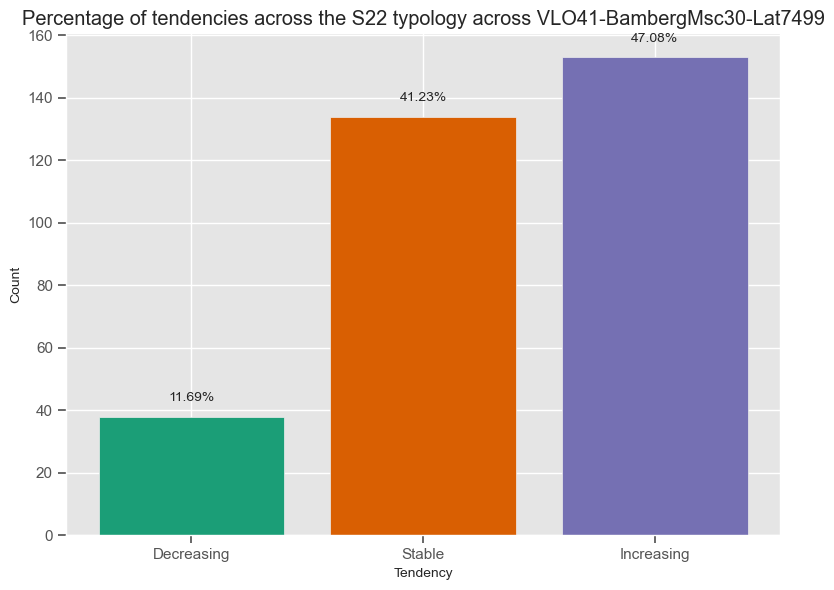

In [414]:
import matplotlib.pyplot as plt

# Calculate the total count
total_count = decreasing_count + stable_count + increasing_count

# Calculate the percentages
decreasing_percentage = (decreasing_count / total_count) * 100
stable_percentage = (stable_count / total_count) * 100
increasing_percentage = (increasing_count / total_count) * 100

# Create a larger figure with a cute style
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-pastel')

# Create a bar plot to visualize the counts
tendencies = ['Decreasing', 'Stable', 'Increasing']
counts = [decreasing_count, stable_count, increasing_count]
percentages = [decreasing_percentage, stable_percentage, increasing_percentage]
colors = ['#1B9E77', '#D95F02', '#7570B3']

plt.bar(tendencies, counts, color=colors)
plt.xlabel('Tendency')
plt.ylabel('Count')
plt.title('Percentage of tendencies across the S22 typology across VLO41-BambergMsc30-Lat7499')

# Add percentages on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 5, f'{percentages[i]:.2f}%', ha='center')

plt.tight_layout()
plt.show()

In [415]:
merged_df_full_gloss_to_marginalia = merged_df_full [['lemma_id','marginal_note_id_VLO41','marginal_note_id_Bamberg','marginal_note_id']]
merged_df_full_gloss_to_marginalia


,lemma_id,marginal_note_id_VLO41,marginal_note_id_Bamberg,marginal_note_id
0,p447_l01_o00,++++/de uer[bo] ++++/[bo]nus contextor,p447_l01_o00_a,NaN
1,p447_l05_o02,NaN,NaN,p447_l05_o02_b
2,p447_l05_o04,NaN,NaN,p447_l05_o04_b
3,p447_l05_o05,NaN,NaN,NaN
4,p447_l05_o06,NaN,NaN,NaN
...,...,...,...,...
492,p466_l06_o03,NaN,p466_l06_o03_b,NaN
493,p466_l21_o09,NaN,NaN,NaN
494,p466_l22_o02,NaN,NaN,NaN
495,p470_l09_o07,NaN,p470_l09_o07_b,NaN


In [416]:
# Rows where gloss_VLO41 has None marginal_note_id_VLO41 and marginal_note_id_Bamberg is not None
condition_1 = (merged_df_full_gloss_to_marginalia['marginal_note_id_VLO41'].isna()) & (~merged_df_full_gloss_to_marginalia['marginal_note_id_Bamberg'].isna())
subset_1 = merged_df_full_gloss_to_marginalia[condition_1]

# Count of rows with None marginal_note_id_VLO41 and non-None marginal_note_id_Bamberg
count_1 = subset_1.shape[0]

condition_2 = (merged_df_full_gloss_to_marginalia['marginal_note_id_Bamberg'].isna()) & (~merged_df_full_gloss_to_marginalia['marginal_note_id'].isna())
subset_2 = merged_df_full_gloss_to_marginalia[condition_2]

count_2 = subset_2.shape[0]

# Rows where both marginal_note_id_VLO41 and marginal_note_id_Bamberg have None, and marginal_note_id is not None
condition_3 = (merged_df_full_gloss_to_marginalia['marginal_note_id_VLO41'].isna()) & (~merged_df_full_gloss_to_marginalia['marginal_note_id'].isna())
subset_3 = merged_df_full_gloss_to_marginalia[condition_3]

# Count of rows with None marginal_note_id_VLO41, None marginal_note_id_Bamberg, and non-None marginal_note_id
count_3 = subset_3.shape[0]

total_rows = merged_df_full_gloss_to_marginalia.shape[0]

# Calculate percentages
percentage_1 = (count_1 / total_rows) * 100
percentage_2 = (count_2 / total_rows) * 100
percentage_3 = (count_3 / total_rows) * 100


print(f"Rows with None marginal_note_id_VLO41 and non-None marginal_note_id_Bamberg: {count_1}")
print(f"Rows with None marginal_note_id_Bamberg and not None marginal_note_id: {count_2}")
print(f"Rows with None marginal_note_id_VLO41, and non-None marginal_note_id: {count_3}")

print(f"Percentage of rows with None marginal_note_id_VLO41 and non-None marginal_note_id_Bamberg: {percentage_1:.2f}%")
print(f"Percentage of rows with None marginal_note_id_Bamberg and not None marginal_note_id: {percentage_2:.2f}%")
print(f"Percentage of rows with None marginal_note_id_VLO41, and non-None marginal_note_id: {percentage_3:.2f}%")

Rows with None marginal_note_id_VLO41 and non-None marginal_note_id_Bamberg: 111
Rows with None marginal_note_id_Bamberg and not None marginal_note_id: 80
Rows with None marginal_note_id_VLO41, and non-None marginal_note_id: 112
Percentage of rows with None marginal_note_id_VLO41 and non-None marginal_note_id_Bamberg: 22.33%
Percentage of rows with None marginal_note_id_Bamberg and not None marginal_note_id: 16.10%
Percentage of rows with None marginal_note_id_VLO41, and non-None marginal_note_id: 22.54%


/var/folders/ps/09_p7rl14y11qx52mcmvrr_w0000gq/T/ipykernel_87005/709202595.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


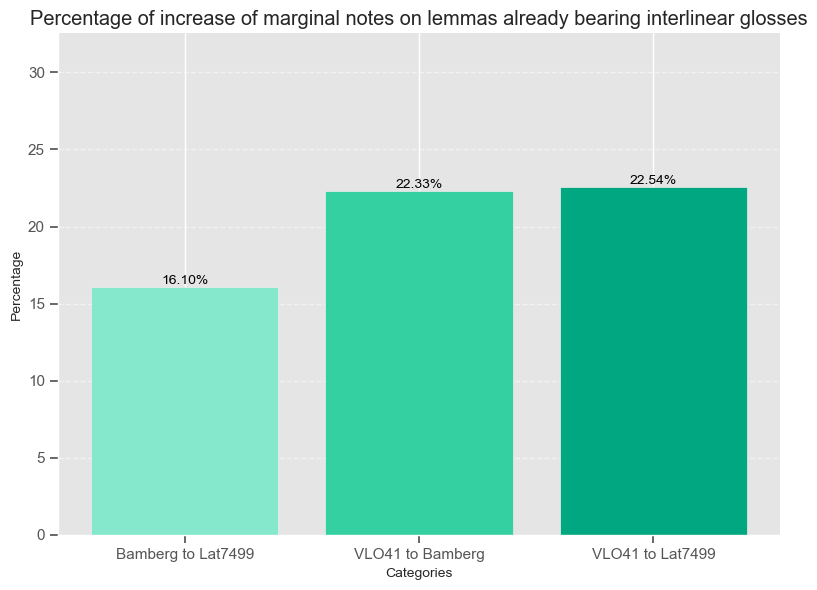

In [417]:
import matplotlib.pyplot as plt

# Define the labels and percentages
labels = ['Bamberg to Lat7499', 'VLO41 to Bamberg', 'VLO41 to Lat7499']
percentages = [percentage_2, percentage_1, percentage_3]

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar plot with custom colors
bar_colors = ['#85E7CB', '#34D0A2', '#00A781']
ax.bar(labels, percentages, color=bar_colors)
ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of increase of marginal notes on lemmas already bearing interlinear glosses')
ax.set_xticklabels(labels)
ax.set_ylim(0, max(percentages) + 10)

# Add value labels to the bars
for i, percentage in enumerate(percentages):
    ax.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', color='black')

# Customize the plot aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display and save the plot
plt.tight_layout()
plt.savefig('graphs/incremental_gloss_to_marge.png')
plt.show()

## The core gloss tradition passed down to every single mss with the same form and type no matter the divergencies though

In [316]:
# Filter the rows where the conditions are met
common_all = merged_df_full[
    (merged_df_full['gloss_type_VLO41'] == merged_df_full['gloss_type_Bamberg']) &
    (merged_df_full['gloss_type_Bamberg'] == merged_df_full['gloss_type']) &
    (merged_df_full['gloss_form_VLO41'] == merged_df_full['gloss_form_Bamberg']) &
    (merged_df_full['gloss_form_Bamberg'] == merged_df_full['gloss_form'])
]


# Select the desired columns
common_all = common_all[['lemma_id', 'gloss_type_VLO41', 'gloss_type_Bamberg', 'gloss_type',
                         'gloss_form_VLO41', 'gloss_form_Bamberg', 'gloss_form']]

# Merge with merged_df_Bamberg_Lat7499 to get 'lemma_Bamberg' and 'lemma_Lat7499'
common_all = common_all.merge(merged_df_full[['lemma_id', 'lemma_VLO41', 'gloss_VLO41', 'lemma_Bamberg', 'gloss_Bamberg', 'lemma', 'gloss']],
                              on='lemma_id', how='left')

# Save the result as a CSV file
common_all.to_csv('identical_glosses_csv/identical_glosses_allmss.csv', index=False)

# Display the new DataFrame
common_all

,lemma_id,gloss_type_VLO41,gloss_type_Bamberg,gloss_type,gloss_form_VLO41,gloss_form_Bamberg,gloss_form,lemma_VLO41,gloss_VLO41,lemma_Bamberg,gloss_Bamberg,lemma,gloss
0,p447_l05_o06,S22,S22,S22,F2,F2,F2,auditorum,iđ discipulorũ,AVDITORVM,discipulorũ,AVDITORṼ,discipuloꝵ
1,p447_l07_o01,S22,S22,S22,F2,F2,F2,desiderat,cupit,desider&,c̃cupiscat,desideret,.s. audire
2,p447_l07_o03,S22,S22,S22,F2,F2,F2,recens,nouit(er),recens,nouum,recens,Nouũ
3,p447_l11_o06,S22,S22,S22,F2,F2,F2,romana,lat̃,romana,latina,romana,÷ latina
4,p447_l13_o03,S22,S22,S22,F3,F3,F3,instruitur,ordinatur /(et di)sponitur,instruit᷑,disponit᷑ ORDIN ͣ ͭ ͧ ͬ,instruit᷑,ordinat᷑ et disponit᷑
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,p463_l15_o03,S22,S22,S22,F2,F2,F2,insignis,nobilis,insignis,nobilis,in̶asignis,nobilis
110,p463_l25_o09,S22,S22,S22,F2,F2,F2,metior,mensuro,M&ior,m̃suro,metior,÷ mensuro
111,p466_l06_o03,S22,S22,S22,F2,F2,F2,rimor,ꝑscrutor,Rimor,inuestigo,Rimor,inqͥro
112,p466_l21_o09,S23,S23,S23,F4,F4,F4,paciscor,pactũ facio,Paciscor,pacẽ facio,pacisor,pacẽ fatio
